Recall that in content-based recommendation systems, each item is described by a vector x called the item profile. In that method, we need to find a coefficient vector w corresponding to each user such that the known rating that the user gives the item is approximately equal to

$$y \approx \mathbf{w}^T \mathbf{x} = \mathbf{x}^T \mathbf{w}$$

With this approach, the utility matrix $\mathbf{Y}$, assuming it is fully filled, will approximate:

$$
\mathbf{Y} \approx \left[ \begin{matrix}
\mathbf{x}^T_1\mathbf{w}_1 & \mathbf{x}^T_1\mathbf{w}_2 & \dots & \mathbf{x}^T_1 \mathbf{w}_N \newline
\mathbf{x}^T_2\mathbf{w}_1 & \mathbf{x}^T_2\mathbf{w}_2 & \dots & \mathbf{x}^T_2 \mathbf{w}_N \newline
\dots & \dots & \ddots & \dots \newline
\mathbf{x}^T_M\mathbf{w}_1 & \mathbf{x}^T_M\mathbf{w}_2 & \dots & \mathbf{x}^T_M \mathbf{w}_N \newline
\end{matrix} \right]
 = \left[ \begin{matrix}
\mathbf{x}^T_1 \newline
\mathbf{x}^T_2 \newline
\dots \newline
\mathbf{x}^T_M \newline
\end{matrix} \right]
\left[ \begin{matrix}
\mathbf{w}_1 & \mathbf{w}_2 & \dots & \mathbf{w}_N
\end{matrix} \right] = \mathbf{X}^T\mathbf{W}
$$

where $M$ and $N$ are the number of items and users, respectively. Note that in content-based collaborative filtering, $\mathbf{x}$ is constructed based on item description information and this construction process is independent of the process of finding the appropriate coefficient for each user. Thus, the construction of item profiles plays a very important role and has a direct impact on the performance of the model. In addition, constructing individual models for each user leads to poor results because it fails to exploit the relationships between users.

Now, suppose that we do not need to construct the item profiles $\mathbf{x}$ in advance, but that the feature vector for each item can be trained simultaneously with the model for each user (here, a coefficient vector). This means that the variables in the optimization problem are both $\mathbf{X}$ and $\mathbf{W}$; where $\mathbf{X}$ is the matrix of the entire item profile, each column corresponding to an item, and $\mathbf{W}$ is the matrix of the entire user model, each column corresponding to a user.

In this way, we are trying to approximate the utility matrix $\mathbf{Y} \in \mathbb{R}^{M\times N}$ by the product of two matrices $\mathbf{X} \in \mathbb{R}^{K\times M}$ and $\mathbf{W} \in \mathbb{R}^{K\times N}$. Typically, $K$ is chosen to be a number much smaller than $M, N$. Then, both matrices $\mathbf{X}$ and $\mathbf{W}$ have ranks no higher than $K$. Therefore, this method is also called low-rank matrix factorization (_Figure 1_).

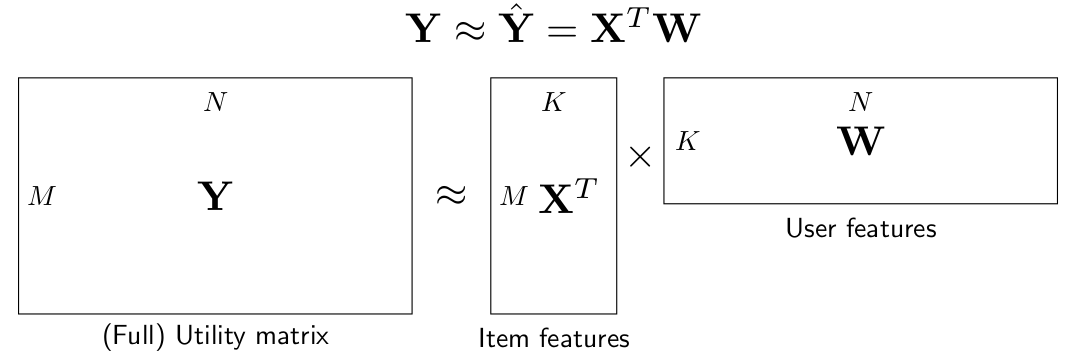

_Figure 1: Matrix Factorization. Utility matrix $\mathbf{Y}$ is decomposed into the product of two low-rank matrices $\mathbf{X}$ and $\mathbf{W}$._

There are a few points to note:

- The main idea behind matrix factorization for recommendation systems is that there are latent features that describe the relevance of items to users. For example, in a movie recommendation system, the latent feature could be crime, politics, action, comedy, etc.; it could be some combination of these; or it could be anything that we don’t really care to name. Each item will have a latent feature to some extent, as indicated by the coefficients in its vector $\mathbf{x}$, with higher coefficients indicating a higher likelihood of having that feature. Similarly, each user will also have a tendency to like certain latent features, as described by the coefficients in its vector $\mathbf{w}$. High coefficients indicate that the user likes movies with that latent feature. The value of the expression $\mathbf{x}^T \mathbf{w}$ will be high if the corresponding components of $\mathbf{x}$ and $\mathbf{w}$ are both high (and positive). This means that the item has hidden properties that the user likes, so we should suggest this item to that user.
- Why is matrix factorization classified as collaborative filtering? The answer comes from optimizing the loss function, which we will discuss next. Basically, to find the solution to the optimization problem, we have to find $\mathbf{X}$ and $\mathbf{W}$ respectively when the remaining components are fixed. Thus, each column of $\mathbf{X}$ will depend on all the columns of $\mathbf{W}$. Conversely, each column of $\mathbf{W}$ depends on all the columns of $\mathbf{X}$. Thus, there are intricate relationships between the components of the two matrices above. That is, we need to use information from all to infer all. So this method is also classified as collaborative filtering.
- In practical problems, the number of items $M$ and the number of users $N$ are often very large. Finding simple models to predict ratings needs to be done as quickly as possible. Neighborhood-based collaborative filtering does not require much training, but in the prediction process, we need to find the similarity of the user in question with all the remaining users and then infer the results. In contrast, with matrix factorization, the training can be a bit complicated because we have to repeatedly optimize one matrix while fixing the other, but the prediction is simpler because we only need to take the dot product of two vectors $\mathbf{x}^T \mathbf{w}$, each of which has a length $K$ which is much smaller than $M, N$. Therefore, the prediction process does not require high computational power. This makes it suitable for models with large data sets.
- In addition, storing the two matrices $\mathbf{X}$ and $\mathbf{W}$ requires a small amount of memory compared to storing the entire utility and similarity matrices in neighborhood-based collaborative filtering. Specifically, we need memory to hold $K(M + N)$ elements instead of $M^2$ or $N^2$ of the similarity matrix.

# Building and optimizing the loss function

As mentioned, user n's rating of item m can be approximated by $y_{mn} = \mathbf{x}^T_m \mathbf{w}_n$. We can also add biases to this approximation formula and optimize those biases. Specifically:

$$y_{mn} = \mathbf{x}^T_m \mathbf{w}_n + b_m + d_n$$

where $b_m$ and $d_n$ are free coefficients corresponding to item $m$ and user $n$, respectively. Vector $\mathbf{b} = [b_1, b_2, \ldots, b_M]^T$ is the bias vector for the items, vector $\mathbf{d} = [d_1, d_2, \ldots, d_N]^T$ is the bias vector for the users. As in neighborhood-based collaborative filtering (NBCF), these values ​​can also be considered as data normalization values ​​with $\mathbf{b}$ corresponding to item-item CF and $\mathbf{d}$ corresponding to user-user CF. Unlike in NBCF, these values ​​will be optimized to find the values ​​that best approximate the training set. In addition, training both $\mathbf{d}$ and $\mathbf{b}$ simultaneously helps to combine both user-user CF and item-item CF into one optimization problem. Therefore, we expect that this method will give better performance.

## The loss function

$$\mathcal{L}(\mathbf{X}, \mathbf{W}, \mathbf{b}, \mathbf{d}) = \underbrace{\frac{1}{2s} \sum_{n=1}^N \sum_{m : r_{mn} = 1} (\mathbf{x}^T_m\mathbf{w}_n + b_m + d_n - y_{mn})^2}_\text{data loss} + \underbrace{\frac{\lambda}{2} (||\mathbf{X}||_F^2 + ||\mathbf{W}||_F^2)}_\text{regularization loss}$$

where $r_{mn} = 1$ if item $m$ has been rated by user $n, s$ is the number of ratings in the training set, $y_{mn}$ is the unnormalized rating $1$ of user $n$ for item $m$. The first part of the loss function, data loss, is the average error of the model. The second part, regularization loss, is $l2$ regularization, which helps avoid overfitting.

Simultaneous optimization of $\mathbf{X, W, b, d}$ is relatively complicated. Instead, the method used is to optimize one of the two pairs $(\mathbf{X, b}), (\mathbf{W, d})$ in turn while fixing the other pair. This process is repeated until the loss function converges.

## Optimizing the loss function

When the pair $(\mathbf{X, b})$ is fixed, the optimization problem of the pair $(\mathbf{W, d})$ can be decomposed into $N$ sub-problems:

$$\mathcal{L}_1(\mathbf{w}_n, d_n) = \frac{1}{2s} \sum_{m:r_{mn} = 1} (\mathbf{x}^T_m\mathbf{w}_n + b_m + d_n - y_{mn})^2 + \frac{\lambda}{2}||\mathbf{w}_n||_F^2 \tag{1}$$

Each problem can be optimized by gradient descent. Our important task is to compute the derivatives of each of these small loss functions with respect to $\mathbf{w}_n$ and $d_n$. Since the expression in $\sum$ depends only on the items rated by the user concerned (corresponding to $r_{mn} = 1$), we can simplify $(1)$ by letting $\hat{\mathbf{X}}_n$ be the submatrix formed by the columns of $\mathbf{X}$ corresponding to the items rated by user $n, \hat{\mathbf{b}}_n$ be the corresponding sub-bias vector, and $\hat{\mathbf{y}}_n$ be the corresponding ratings. Then

$$\mathcal{L}_1(\mathbf{w}_n, d_n) = \frac{1}{2s} ||\hat{\mathbf{X}}^T_n\mathbf{w}_n + \hat{\mathbf{b}}_n + d_n\mathbf{1} - \hat{\mathbf{y}}_n||^2 + \frac{\lambda}{2}||\mathbf{w}_n||_F^2$$

The partial derivatives of this equation are:

$$\frac{\partial \mathcal{L}_1}{\partial \mathbf{w}_n} = \frac{1}{s} \hat{\mathbf{X}}_n(\hat{\mathbf{X}}^T_n\mathbf{w}_n + \hat{\mathbf{b}}_n + d_n\mathbf{1} - \hat{\mathbf{y}}_n) + \lambda \mathbf{w}_n$$
$$\frac{\partial \mathcal{L}_1}{\partial d_n} = \frac{1}{s}\mathbf{1}^T(\hat{\mathbf{X}}^T_n\mathbf{w}_n + \hat{\mathbf{b}}_n + d_n\mathbf{1} - \hat{\mathbf{y}}_n)$$

Formula updates for $\mathbf{w}_n$ and $d_n$ are:

$$\mathbf{w}_n \leftarrow \mathbf{w}_n - \eta \left(\frac{1}{s} \hat{\mathbf{X}}_n(\hat{\mathbf{X}}^T_n\mathbf{w}_n + \hat{\mathbf{b}}_n + d_n\mathbf{1} - \hat{\mathbf{y}}_n) + \lambda \mathbf{w}_n\right)$$
$$d_n \leftarrow d_n - \eta \left(\frac{1}{s}\mathbf{1}^T(\hat{\mathbf{X}}^T_n\mathbf{w}_n + \hat{\mathbf{b}}_n + d_n\mathbf{1} - \hat{\mathbf{y}}_n)\right)$$

Similarly, each column $\mathbf{x}_m$ of $\mathbf{X}$, i.e. feature vector of each item, and $b_m$ will be sought by optimizing the problem:

$$\mathcal{L}_2(\mathbf{x}_m, b_m) = \frac{1}{2s} \sum_{n:r_{mn} = 1} (\mathbf{w}^T_n\mathbf{x}_m + b_m + d_n - y_{mn})^2 + \frac{\lambda}{2}||\mathbf{x}_m||_F^2$$

Let $\hat{\mathbf{W}}_m$ be the submatrix formed by the columns of $\mathbf{W}$ corresponding to the users who rated item $m, \hat{\mathbf{d}}_m$ be the corresponding sub-bias vector, and $\hat{\mathbf{y}}_m$ be the corresponding ratings. Then

$$\mathcal{L}_2(\mathbf{x}_m, b_m) = \frac{1}{2s} ||\hat{\mathbf{W}}^T_m\mathbf{x}_m + \hat{\mathbf{d}}_m + b_m\mathbf{1} - \hat{\mathbf{y}}_m||^2 + \frac{\lambda}{2}||\mathbf{x}_m||_F^2$$

Same as above, formula updates for $\mathbf{x}_m$ and $b_m$ are:

$$\mathbf{x}_m \leftarrow \mathbf{x}_m - \eta \left(\frac{1}{s} \hat{\mathbf{W}}_m(\hat{\mathbf{W}}^T_m\mathbf{x}_m + \hat{\mathbf{d}}_m + b_m\mathbf{1} - \hat{\mathbf{y}}_m) + \lambda \mathbf{x}_m\right)$$
$$b_m \leftarrow b_m - \eta \left(\frac{1}{s}\mathbf{1}^T(\hat{\mathbf{W}}^T_m\mathbf{x}_m + \hat{\mathbf{d}}_m + b_m\mathbf{1} - \hat{\mathbf{y}}_m)\right)$$

## Python programming



In [16]:
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse 

class MF(object):
    """docstring for CF"""
    def __init__(self, Y_data, K, lam = 0.1, Xinit = None, Winit = None, learning_rate = 0.5, max_iter = 1000, print_every = 100):
        self.Y_raw_data = Y_data # represents the original data
        self.K = K # number of latent features
        self.lam = lam
        self.learning_rate = learning_rate
        self.max_iter = max_iter 
        self.print_every = print_every # print loss after each print_every iterations
        # number of users, items, and ratings. Remember to add 1 since id starts from 0
        self.n_users = int(np.max(Y_data[:, 0])) + 1 
        self.n_items = int(np.max(Y_data[:, 1])) + 1
        self.n_ratings = Y_data.shape[0]
        
        self.X = np.random.randn(self.n_items, K) if Xinit is None else Xinit
        self.W = np.random.randn(K, self.n_users) if Winit is None else Winit
        self.b = np.random.randn(self.n_items) # item biases
        self.d = np.random.randn(self.n_users) # user biases
            
        # normalized data, update later in normalized_Y function
        self.Y_data_n = self.Y_raw_data.copy()

    def loss(self):
        L = 0 
        for i in range(self.n_ratings):
            # user, item, rating
            n, m, rate = int(self.Y_data_n[i, 0]), int(self.Y_data_n[i, 1]), self.Y_data_n[i, 2]
            L += 0.5*(self.X[m, :].dot(self.W[:, n]) + self.b[m] + self.d[n] - rate)**2
        
        L /= self.n_ratings # take average 
        L += 0.5*self.lam*(np.linalg.norm(self.X, 'fro') + np.linalg.norm(self.W, 'fro')) # regularization, don't ever forget this
        # 'fro' means Frobenius norm
        return L

    def updateXb(self):
        for m in range(self.n_items):
            # get all users who rated item m and get the corresponding ratings
            ids = np.where(self.Y_raw_data[:, 1] == m)[0] # row indices of items m
            user_ids, ratings = self.Y_raw_data[ids, 0].astype(np.int32), self.Y_raw_data[ids, 2]
            Wm, dm = self.W[:, user_ids], self.d[user_ids]
            for i in range(30): # 30 iteration for each sub problem
                xm = self.X[m]
                error = xm.dot(Wm) + self.b[m] + dm - ratings
                grad_xm = error.dot(Wm.T)/self.n_ratings + self.lam*xm
                grad_bm = np.sum(error)/self.n_ratings
                # gradient descent
                self.X[m] -= self.learning_rate*grad_xm.reshape(-1) # reshape because grad_xm has shape (1, K) and we need it to be (K, )
                self.b[m] -= self.learning_rate*grad_bm

    def updateWd(self): # and d
        for n in range(self.n_users):
            # get all items rated by user n, and the corresponding ratings
            ids = np.where(self.Y_raw_data[:,0] == n)[0] # row indices of items rated by user n
            item_ids, ratings = self.Y_raw_data[ids, 1].astype(np.int32), self.Y_raw_data[ids, 2]
            Xn, bn = self.X[item_ids], self.b[item_ids]
            for i in range(30): # 30 iteration for each sub problem
                wn = self.W[:, n]
                error = Xn.dot(wn) + bn + self.d[n] - ratings
                grad_wn = Xn.T.dot(error)/self.n_ratings + self.lam*wn
                grad_dn = np.sum(error)/self.n_ratings
                # gradient descent
                self.W[:, n] -= self.learning_rate*grad_wn.reshape(-1)
                self.d[n] -= self.learning_rate*grad_dn

    def evaluate_RMSE(self, rate_test):
        n_tests = rate_test.shape[0] # number of test
        SE = 0 # squared error
        for n in range(n_tests):
            pred = self.pred(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2
        RMSE = np.sqrt(SE/n_tests)
        return RMSE

    def fit(self):
        for it in range(self.max_iter):
            self.updateWd()
            self.updateXb()
            if (it + 1) % self.print_every == 0:
                rmse_train = self.evaluate_RMSE(self.Y_raw_data)
                print('iter = %d, loss = %.4f, RMSE train = %.4f' %(it + 1, self.loss(), rmse_train))

    def pred(self, u, i):
        """
        predict the rating of user u for item i
        """
        u, i = int(u), int(i)
        pred = self.X[i, :].dot(self.W[:, u]) + self.b[i] + self.d[u]
        return max(0, min(5, pred)) # pred should be between 0 and 5 in MoviesLens

### Applying the model to the MovieLens dataset

In [17]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('Datasets/ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('Datasets/ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

rate_train = ratings_base.to_numpy()
rate_test = ratings_test.to_numpy()

# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1

In [22]:
rs = MF(rate_train, K = 10, lam = .01, print_every = 10, learning_rate = 50, max_iter = 100)
rs.fit()
# evaluate on test data
RMSE = rs.evaluate_RMSE(rate_test)
print('\nMatrix Factorization CF, RMSE =', RMSE)

iter = 10, loss = 0.4216, RMSE train = 0.9181
iter = 20, loss = 0.4162, RMSE train = 0.9121
iter = 30, loss = 0.4152, RMSE train = 0.9111
iter = 40, loss = 0.4148, RMSE train = 0.9106
iter = 50, loss = 0.4146, RMSE train = 0.9104
iter = 60, loss = 0.4145, RMSE train = 0.9103
iter = 70, loss = 0.4144, RMSE train = 0.9102
iter = 80, loss = 0.4144, RMSE train = 0.9101
iter = 90, loss = 0.4143, RMSE train = 0.9101
iter = 100, loss = 0.4143, RMSE train = 0.9101

Matrix Factorization CF, RMSE = 0.9626822140435016
